## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [1]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

## Loading data

In [2]:
data= pd.read_csv("Suzuki-2.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"6742,00","6600,00","6744,00","6588,00","1940000,0","0,0318"
1,05/01/2018,"6740,00","6742,00","6775,00","6681,00","2010000,0","-0,0003"
2,09/01/2018,"6653,00","6800,00","6811,00","6648,00","2100000,0","-0,0129"
3,10/01/2018,"6666,00","6650,00","6699,00","6636,00","1070000,0","0,002"
4,11/01/2018,"6564,00","6634,00","6644,00","6528,00","1660000,0","-0,0153"
...,...,...,...,...,...,...,...
1447,08/12/2023,"5744,00","5732,00","5769,00","5679,00","2320000,0","-0,025"
1448,11/12/2023,"5742,00","5724,00","5782,00","5708,00","1490000,0","-0,0003"
1449,12/12/2023,"5639,00","5800,00","5818,00","5638,00","1760000,0","-0,0179"
1450,13/12/2023,"5682,00","5600,00","5696,00","5545,00","1940000,0","0,0076"


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [5]:
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [6]:
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,4968.014807,4971.077135,5025.840220,4914.231061,1.824907e+06,0.000106
min,2018-01-04 00:00:00,2465.500000,2469.500000,2551.500000,2438.000000,4.430000e+05,-0.139700
25%,2019-07-01 18:00:00,4493.250000,4500.000000,4566.000000,4451.750000,1.260000e+06,-0.011725
50%,2020-12-28 12:00:00,4867.500000,4870.500000,4921.500000,4818.500000,1.630000e+06,0.000000
75%,2022-06-24 18:00:00,5424.250000,5423.500000,5504.250000,5367.000000,2.140000e+06,0.011700
max,2023-12-14 00:00:00,7639.000000,7613.000000,7680.000000,7494.000000,9.980000e+06,0.111500
std,NaN,833.802239,836.965130,837.524591,833.583430,8.684992e+05,0.021457


## Data Visualization

In [7]:
df=data['Price'].values
df = df.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_scaled=scaler.fit_transform(df)
price_scaled

array([[0.82661641],
       [0.82622983],
       [0.80941336],
       ...,
       [0.61341452],
       [0.6217261 ],
       [0.57900841]])

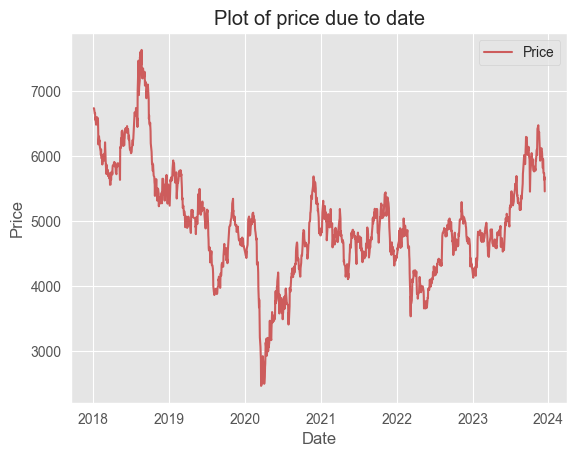

In [9]:
# Tạo biểu đồ
plt.figure(figure=(10,6))
plt.plot(data['Date'], data['Price'].values, label="Price", color="IndianRed")

# Thêm tiêu đề
plt.title("Plot of price due to date")

# Thêm nhãn cho các trục
plt.xlabel("Date")
plt.ylabel("Price")

# Hiển thị biểu đồ
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

In [10]:
def Train_test_split(sequence, n_steps, train_size, test_size):

    data_train = sequence[:train_size]  # Tách lấy phần dữ liệu huấn luyện
    data_test = sequence[train_size:train_size+test_size]  # Tách lấy phần dữ liệu kiểm tra

    X_train, X_test, y_train, y_test = [], [], [], []  # Khởi tạo các danh sách rỗng

    # Tạo các mẫu dữ liệu và nhãn tương ứng cho từng tập
    for i in range(len(data_train) - n_steps):
        X_train.append(data_train[i:i+n_steps])  # Thêm mẫu dữ liệu vào X_train
        y_train.append(data_train[i+n_steps])  # Thêm nhãn tương ứng vào y_train

    for i in range(len(data_test) - n_steps):
        X_test.append(data_test[i:i+n_steps])
        y_test.append(data_test[i+n_steps])


    return array(X_train), array(X_test), array(y_train), array(y_test),  # Trả về các mảng NumPy


## Proposed model

### CNN+GRU

In [11]:
from keras.models import Sequential
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping
from keras.layers import GRU, Dense, ConvLSTM2D, ConvLSTM1D, Dropout,Conv2D, TimeDistributed, Conv1D, MaxPooling1D, Flatten, RepeatVector, MaxPooling2D, MaxPooling3D, BatchNormalization
from keras.optimizers import Adam

def CNN_GRU_model(X_train, y_train, X_test, y_test, loss='mse'):
    model = Sequential()

    # Convolutional layer for spatial feature extraction
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2)) # Downsample features

    # GRU layer for sequential processing
    model.add(GRU(200, activation='relu', return_sequences=True))  # Use GRU 

    # Dense layers for final output
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    # Compile the model with the desired optimizer and loss
    model.compile(optimizer='adam', loss=loss)

    # Train the model with early stopping
    callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
    model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_test, y_test), callbacks=[callback])

    return model

In [12]:
# Evaluate model
def Eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_inverted = scaler.inverse_transform(y_pred.reshape(y_pred.shape[0],-1))
    y_test_inverted = scaler.inverse_transform(y_test.reshape(y_test.shape[0],-1))
    rmse = round(mean_squared_error(y_test_inverted, y_pred_inverted, squared=False),1)
    mape = round(mean_absolute_percentage_error(y_test_inverted, y_pred_inverted)*100,2)
    mae = round(mean_absolute_error(y_test_inverted, y_pred_inverted),1)
    hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
    return y_pred_inverted, rmse, mape, mae, hl

## Training and testing model

#### Train 70% - Test 30%

In [13]:
train_size = int(0.7*len(price_scaled))
test_size = int(0.3*len(price_scaled))
time_step = 100
X_train, X_test, y_train, y_test = Train_test_split(price_scaled, n_steps=time_step, train_size=train_size, test_size=test_size)

In [14]:
n_seq = 2
X_train = X_train.reshape(X_train.shape[0], n_seq, time_step//n_seq, 1)
X_test = X_test.reshape(X_test.shape[0], n_seq, time_step//n_seq, 1)

In [15]:
X_train.shape

(916, 2, 50, 1)

In [16]:
model = CNN_GRU_model(X_train, y_train, X_test, y_test)

Epoch 1/300
29/29 [==============================] - 1s 5ms/step - loss: 0.0480 - val_loss: 0.0074
Epoch 2/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0053
Epoch 3/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0030
Epoch 4/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 5/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 6/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0036
Epoch 7/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 8/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 9/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 10/300
29/29 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0024
Epoch 11/

In [17]:
y_pred_test, rmse, mape, mae,hl = Eval_model(model, X_test, y_test)
print(f"RMSE score of the model: {rmse}")
print(f"MAPE score of the model: {mape}%")
print(f"MAE score of the model: {mae}")
print(f"Huber loss of the model: {hl}")

11/11 [==============================] - 0s 789us/step
RMSE score of the model: 233.9
MAPE score of the model: 3.73%
MAE score of the model: 189.7
Huber loss of the model: [0.0020438]


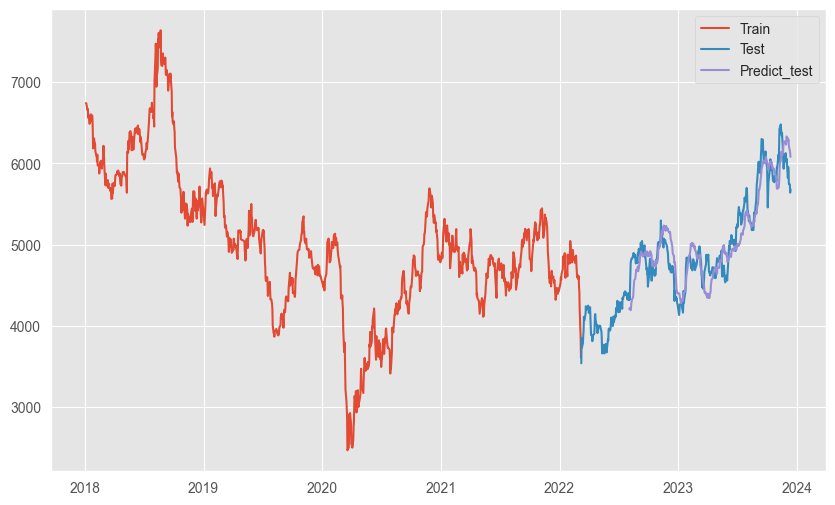

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.legend()
plt.show()

## Predict

In [22]:
y_pred_30days = []
time_30days = pd.Series(pd.date_range(data['Date'][-1:].values[0], periods=30, freq='D'))
temp_input = price_scaled[-time_step:]

In [23]:
for i in tqdm(range(30)):
    pred_next_day = model.predict(temp_input[i:i+time_step].reshape(1,n_seq,time_step//n_seq,1), verbose=0)
    y_pred_30days.append(scaler.inverse_transform(pred_next_day[0].reshape(1, -1))[0][0])
    temp_input = np.append(temp_input, pred_next_day)

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 33.53it/s]


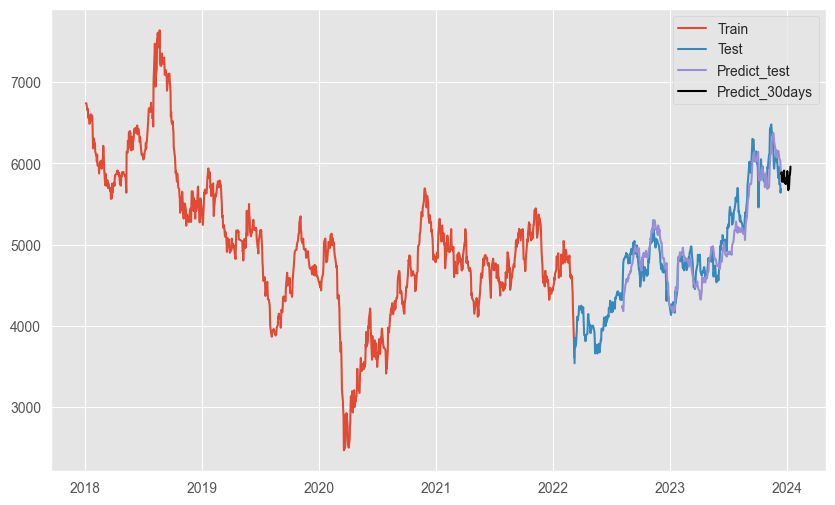

In [24]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.plot(time_30days, y_pred_30days, label = "Predict_30days", color='black')
plt.legend()
plt.show()

**Comment:**

- **The model can predict values relatively accurately**. The values of RMSE, MAPE and MAE are all within acceptable ranges for continuous value prediction tasks.
- **The model with a train/test ratio of 8/2 has the best performance**. The values of RMSE, MAPE and MAE of this model are the lowest, indicating that this model is able to learn the features of the data the best and predict values the most accurately.
- **The model with a train/test ratio of 6/4 has the worst performance**. The values of RMSE, MAPE and MAE of this model are the highest, indicating that this model is not able to learn the features of the data well enough.

**Conclusion:**
The model with a train/test ratio of 8/2 is the best choice for this task. This model is able to predict values relatively accurately and can be used in production.